In [1]:
from src import esma

In [2]:
model = esma.project(project_id='MnTe_SOC')

In [3]:
model.set_pseudo(path="/work/bansil/s.sevim/Test/espresso-machine/Pseudopotentials/PBE/US/SOC")

In [4]:
model.get_structure(format="poscar",path="/work/bansil/s.sevim/Test/espresso-machine/Structures/MnTe.poscar")

In [5]:
model.set_cores(64)
model.ecutwfc(100) #Set wavefunction cutoff
model.ecutrho(1000) #Set wavefunction cutoff
model.k_points([8,8,5]) #Set number of k points
model.degauss(0.01) #Set degauss value
model.conv_thr(1e-6) #Set convergence threshold
model.smearing('mv')
# model.etot_conv_thr(10**-4)
# model.forc_conv_thr(10**-3)

In [6]:
points = [
            ['GAMMA',0,0,0],
            ['M',0.5,0,0],
            ["M'",0.5,0,0.35],
            ["GAMMA'",0,0,0.35],
            ["K",0.33333,0.3333,0]
            ]

In [7]:
import copy

In [9]:
models = []
U = [3,3.5,4,4.5,5]
for i in U:
    temp_model = copy.deepcopy(model)
    temp_model.hubbard(atom='Mn',orbital='3d',value=i)
    models.append(temp_model)

In [10]:
def workflow(model,id):
    afm = model.magnetize(magnetic_atom='Mn',angle1=90,angle2=120)[1]    
    afm.soc()
    afm.job_id = id
    afm.calculate('scf')
    
    path = ['K','GAMMA','K'] #choose corners
    afm.band_points(path,number=100,points=points) #define path
    afm.calculate('bands',pp_core=32)
    afm.plot('electron',ylim=[9,12],save=True,figsize=(4,6),save_name='plot_KGK') #plot electron bands

    path = ["M'","GAMMA'","M'"] #choose corners
    afm.band_points(path,number=100,points=points) #define path
    afm.calculate('bands',pp_core=32)
    afm.plot('electron',ylim=[9,12],save=True,figsize=(4,6),save_name='plot_MGM') #plot electron bands


scf for U_3 is started
scf for U_3 is finished
bands for U_3 is started
bands for U_3 is finished
bands-pp for U_3 is started
bands-pp for U_3 is finished
bands for U_3 is started
bands for U_3 is finished
bands-pp for U_3 is started
bands-pp for U_3 is finished
scf for U_3.5 is started
scf for U_3.5 is finished
bands for U_3.5 is started
bands for U_3.5 is finished
bands-pp for U_3.5 is started


KeyboardInterrupt: 

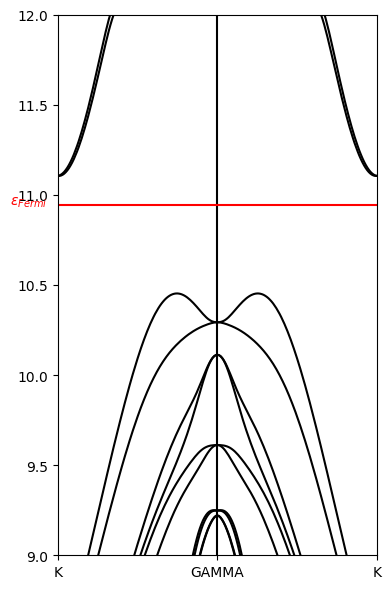

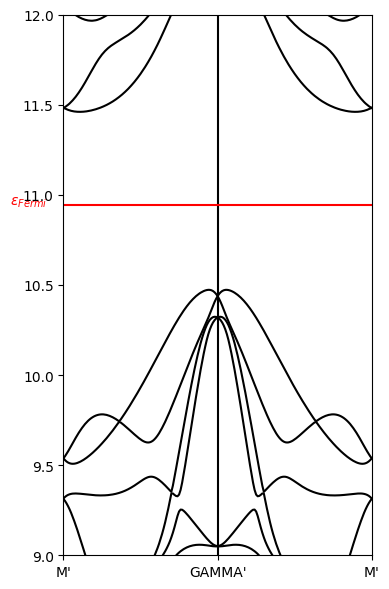

In [12]:
for i,model in enumerate(models):
    workflow(model,f"U_{U[i]}")

In [24]:
model.hubbard(atom='Mn',orbital='3d',value=4)
for i in [3,3.5,4,4.5,5]:
    model.hubbard(atom='Mn',orbital='3d',value=i)
    afm = model.magnetize(magnetic_atom='Mn',angle1=90,angle2=120)[1]    afm.soc()
    afm.calculate('scf')
    path = ['K','GAMMA','K'] #choose corners
    afm.band_points(path,number=100,points=points) #define path
    afm.calculate('bands',pp_core=32)
    path = ["M'","GAMMA'","M'"] #choose corners
    afm.band_points(path,number=100,points=points) #define path
    afm.calculate('bands',pp_core=32)

In [31]:
afm.debug=False

In [30]:
path = ['K','GAMMA','K'] #choose corners
afm.band_points(path,number=40,points=points) #define path
afm.calculate('bands',pp_core=32)

bands for afm1 is started
bands for afm1 is finished
bands-pp for afm1 is started


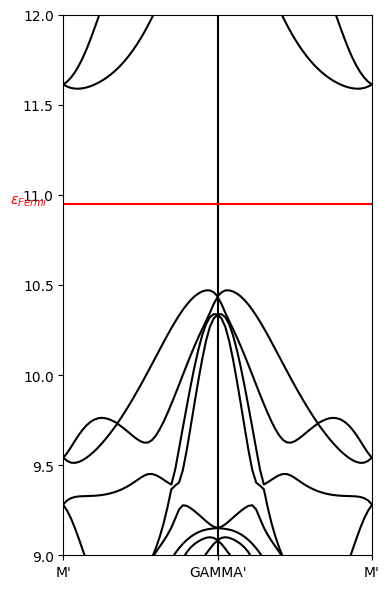

In [ ]:
#Step 6 - Plotting
afm.plot('electron',ylim=[9,12],save=True,figsize=(4,6)) #plot electron bands

In [16]:
import numpy as np

In [17]:
np.array(afm.cell()).astype(float)

array([[ 4.157     ,  0.        ,  0.        ],
       [-2.0785    ,  3.6000676 ,  0.        ],
       [ 0.        ,  0.        ,  6.71099997]])